In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import math
import numpy as np
import arrow
import cmocean

In [2]:
%matplotlib inline

In [3]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
ds

<xarray.Dataset>
Dimensions:    (gridX: 256, gridY: 266, time: 36456)
Coordinates:
  * time       (time) datetime64[ns] 2014-09-12 ... 2018-11-08T23:00:00
  * gridY      (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX      (gridX) float64 0.0 2.5e+03 5e+03 ... 6.35e+05 6.375e+05
Data variables:
    atmpres    (time, gridY, gridX) float32 ...
    precip     (time, gridY, gridX) float32 ...
    qair       (time, gridY, gridX) float32 ...
    solar      (time, gridY, gridX) float32 ...
    tair       (time, gridY, gridX) float32 ...
    therm_rad  (time, gridY, gridX) float32 ...
    u_wind     (time, gridY, gridX) float32 ...
    v_wind     (time, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada, Environment Canada
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    coverage_content_type:     modelResult
    creator_email:             sallen@eos.ubc.ca
    creator_name:

In [4]:
ds.time[0]

<xarray.DataArray 'time' ()>
array(1410480000000000000, dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2014-09-12
Attributes:
    _ChunkSizes:                 1
    _CoordinateAxisType:         Time
    actual_range:                [  1.41048000e+09   1.54171800e+09]
    axis:                        T
    ioos_category:               Time
    long_name:                   verification time generated by wgrib2 functi...
    reference_date:              2018.11.07 18:00:00 UTC
    reference_time:              1541613600.0
    reference_time_description:  kind of product unclear, reference date is v...
    reference_time_type:         0
    standard_name:               time
    time_origin:                 01-JAN-1970 00:00:00
    time_step:                   3600.0
    time_step_setting:           auto

In [5]:
ds.time[-1]

<xarray.DataArray 'time' ()>
array(1541718000000000000, dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-11-08T23:00:00
Attributes:
    _ChunkSizes:                 1
    _CoordinateAxisType:         Time
    actual_range:                [  1.41048000e+09   1.54171800e+09]
    axis:                        T
    ioos_category:               Time
    long_name:                   verification time generated by wgrib2 functi...
    reference_date:              2018.11.07 18:00:00 UTC
    reference_time:              1541613600.0
    reference_time_description:  kind of product unclear, reference date is v...
    reference_time_type:         0
    standard_name:               time
    time_origin:                 01-JAN-1970 00:00:00
    time_step:                   3600.0
    time_step_setting:           auto

## Slice JFM time and then converts xarray into numpy array using ".values"

In [6]:
jan2015_time = ds.time.sel(time=slice("2015-01-01","2015-01-31")).values

In [7]:
u = ds.u_wind.sel(time=slice("2015-01-01","2015-01-31"))

In [8]:
u[0]

<xarray.DataArray 'u_wind' (gridY: 266, gridX: 256)>
array([[-1.906891, -1.711891, -1.596891, ...,  1.233109,  1.458109,  1.393109],
       [-1.921891, -1.756891, -1.631891, ...,  1.053109,  1.403109,  1.573109],
       [-1.941891, -1.766891, -1.646891, ...,  0.978109,  1.153109,  1.358109],
       ..., 
       [-0.526891, -0.411891, -0.401891, ...,  0.983109,  1.418109,  2.313109],
       [-0.426891, -0.331891, -0.356891, ...,  0.868109,  1.413109,  2.303109],
       [-0.336891, -0.266891, -0.311891, ...,  1.093109,  1.488109,  1.958109]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * gridY    (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX    (gridX) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
Attributes:
    _ChunkSizes:  [  1 266 256]
    level:        10 m above ground
    long_name:    U-Component of Wind
    short_name:   UGRD_10maboveground
    units:        m/s

In [9]:
# try NOT converting time to numpy array
# THE BELOW DOESN'T WORK (!?!)
# jan2015_time = ds.time.sel(time=slice("2015-01-01","2015-01-04"))
# u_jan2015 = ds.u_wind.sel(time=jan2015_time)
# v_jan2015 = ds.v_wind.sel(time=jan2015_time)

In [10]:
# THE BELOW GIVES AN ERROR (!?!)
# wpsd_jan2015 = np.sqrt(u_jan2015**2 + v_jan2015**2)

In [12]:
timerange = ['2015-01-01','2015-01-02']
timeslice = slice(*timerange)
u_wind = ds.u_wind.sel(time=timeslice)
v_wind = ds.v_wind.sel(time=timeslice)
wpsd = np.sqrt(u_wind**2 + v_wind**2)

In [14]:
wpsd

<xarray.DataArray (time: 48, gridY: 266, gridX: 256)>
array([[[ 11.002061,  10.994638, ...,   2.160639,   2.043071],
        [ 11.024364,  11.03135 , ...,   2.169315,   2.162931],
        ..., 
        [  2.271031,   2.294677, ...,   2.876569,   3.625932],
        [  2.206419,   2.266318, ...,   1.902628,   2.138863]],

       [[ 10.713838,  10.695386, ...,   2.054711,   2.02482 ],
        [ 10.711945,  10.685802, ...,   2.190991,   2.039036],
        ..., 
        [  5.417507,   4.869889, ...,   2.720867,   3.736682],
        [  5.490757,   4.986056, ...,   1.654908,   2.476436]],

       ..., 
       [[  5.241742,   5.28292 , ...,   2.964951,   3.383865],
        [  5.359813,   5.371505, ...,   2.812346,   3.182844],
        ..., 
        [  8.866494,   8.81579 , ...,   5.369327,   6.111177],
        [  8.891274,   8.825493, ...,   4.99391 ,   5.145195]],

       [[  6.009014,   6.017469, ...,   3.146215,   3.437239],
        [  6.029527,   6.02846 , ...,   3.050932,   3.361556],
   

## Calculate percent time that january 2015 wind speeds are > 10 m/s

In [15]:
#jan2015_wspd = np.sqrt(ds.u_wind.sel(time = jan2015_time)**2 + ds.v_wind.sel(time = jan2015_time)**2)

thresh = 7
wspd_size = wpsd.shape
total = wspd_size[0]

# Create numpy array for percentage value output
wspd_2D_percent = np.zeros((wspd_size[1],wspd_size[2]))
for iy in range(0,wspd_size[1]):
    for ix in range(0,wspd_size[2]):
        wspd_ts = wpsd[:,iy,ix]
        wspd_ts_thresh =  wspd_ts[wspd_ts > thresh]
        wspd_2D_percent[iy,ix] = 100 * len(wspd_ts_thresh) / total


In [16]:
wspd_2D_percent

array([[ 14.58333333,  14.58333333,  14.58333333, ...,   0.        ,
          0.        ,   0.        ],
       [ 14.58333333,  14.58333333,  14.58333333, ...,   0.        ,
          0.        ,   0.        ],
       [ 14.58333333,  14.58333333,  14.58333333, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ 50.        ,  50.        ,  50.        , ...,   0.        ,
          0.        ,   2.08333333],
       [ 50.        ,  50.        ,  50.        , ...,   0.        ,
          0.        ,   2.08333333],
       [ 50.        ,  50.        ,  50.        , ...,   0.        ,
          0.        ,   0.        ]])

In [17]:
total

48

In [18]:
wspd_size

(48, 266, 256)

## plot up results

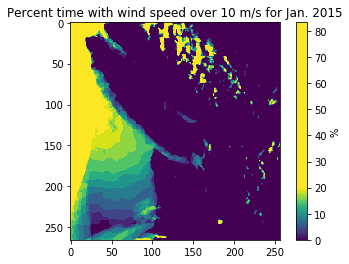

In [37]:
fig, ax = plt.subplots()
cax = ax.imshow(np.flipud(wspd_2D_percent))
ax.set_title('Percent time with wind speed over 10 m/s for Jan. 2015')
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.set_ylabel('%')
cbar.set_clim(0,20)